In [1]:
from shapely.geometry import Point
import requests
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from IPython.display import Image
import pickle
import numpy as np
import pyproj
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import time

%matplotlib inline

In [2]:
Income = pd.read_csv('../data/TNCounties_IncomeMeasures.csv')
Schools = pd.read_excel(r"../data/Schools_Complete.xlsx")
Bankruptcy = pd.read_excel(r"../data/tn_bank.xlsx")

In [3]:
Income.head(5)

Feature ID          Feature Label  \
0      country:us/state:tn/county:shelby      Shelby County, TN   
1   country:us/state:tn/county:van_buren   Van Buren County, TN   
2     country:us/state:tn/county:madison     Madison County, TN   
3        country:us/state:tn/county:clay        Clay County, TN   
4  country:us/state:tn/county:sequatchie  Sequatchie County, TN   

   Median Household Income  Median Earnings - Total  Per Capita Income  \
0                    51657                    31571              30104   
1                    42724                    25704              20634   
2                    48161                    30875              26722   
3                    32167                    24781              18983   
4                    49370                    27602              23050   

   Total Population  
0            936374  
1              5760  
2             97625  
3              7654  
4             14816

In [4]:
new = Income['Feature Label'].str.split(' County,', n=1, expand= True)

In [5]:
Income['County'] = new[0]

In [6]:
Income['State'] = new[1]

In [7]:
Income.drop(columns =['Feature Label'], inplace = True)

In [8]:
Income.head(5)

Feature ID  Median Household Income  \
0      country:us/state:tn/county:shelby                    51657   
1   country:us/state:tn/county:van_buren                    42724   
2     country:us/state:tn/county:madison                    48161   
3        country:us/state:tn/county:clay                    32167   
4  country:us/state:tn/county:sequatchie                    49370   

   Median Earnings - Total  Per Capita Income  Total Population      County  \
0                    31571              30104            936374      Shelby   
1                    25704              20634              5760   Van Buren   
2                    30875              26722             97625     Madison   
3                    24781              18983              7654        Clay   
4                    27602              23050             14816  Sequatchie   

  State  
0    TN  
1    TN  
2    TN  
3    TN  
4    TN

In [9]:
Income = Income.sort_values('Per Capita Income')

In [10]:
Income.head(5)

Feature ID  Median Household Income  \
28        country:us/state:tn/county:lake                    35191   
56    country:us/state:tn/county:hardeman                    40304   
86  country:us/state:tn/county:lauderdale                    39896   
3         country:us/state:tn/county:clay                    32167   
34    country:us/state:tn/county:fentress                    36520   

    Median Earnings - Total  Per Capita Income  Total Population      County  \
28                    25293              15732              7401        Lake   
56                    28984              18172             25443    Hardeman   
86                    29473              18515             25989  Lauderdale   
3                     24781              18983              7654        Clay   
34                    23495              20093             18213    Fentress   

   State  
28    TN  
56    TN  
86    TN  
3     TN  
34    TN

In [11]:
County = Income['County'].head(10)
Per_Capita = Income['Per Capita Income'].head(10)

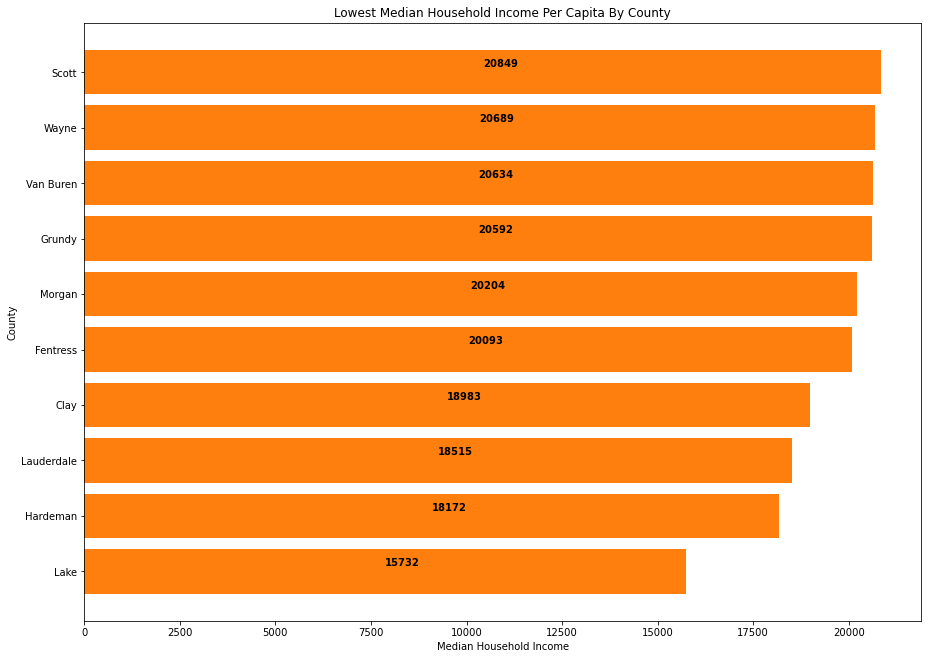

In [12]:
fig = plt.figure(figsize = (15, 11))
plt.barh(County, Per_Capita)
plt.xlabel('Median Household Income')
plt.ylabel('County')
plt.title('Lowest Median Household Income Per Capita By County')



for i in plt.barh(County, Per_Capita):
    plt.text(i.get_width()-0.5*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')

In [13]:
len(list(Bankruptcy['County']))

95

In [14]:
len(list(Schools['County'].unique()))

95

In [15]:
len(list(Income['County'].unique()))

95

In [16]:
Bankruptcy.head(5)

County  County Code  Chapter 7  Chapter 13  Unnamed: 4  Unnamed: 5  \
0  Anderson        47001        138          51         NaN         NaN   
1   Bedford        47003         53          78         NaN         NaN   
2   Bledsoe        47007          6          16         NaN         NaN   
3    Blount        47009        298         104         NaN         NaN   
4   Bradley        47011        221         273         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN          NaN          NaN   

   Unnamed: 12  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [17]:
Bankruptcy['Total Individual'] = Bankruptcy['Chapter 7'] + Bankruptcy['Chapter 13']

In [18]:
Bankruptcy.head(5)

County  County Code  Chapter 7  Chapter 13  Unnamed: 4  Unnamed: 5  \
0  Anderson        47001        138          51         NaN         NaN   
1   Bedford        47003         53          78         NaN         NaN   
2   Bledsoe        47007          6          16         NaN         NaN   
3    Blount        47009        298         104         NaN         NaN   
4   Bradley        47011        221         273         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN          NaN          NaN   

   Unnamed: 12  Total Individual  
0          NaN               189  
1          NaN               131  
2          NaN                22  
3          NaN               402  
4          NaN               494

In [19]:
Bankruptcy = Bankruptcy.sort_values('Total Individual', ascending=False)

In [20]:
Bankruptcy.head(5)

County  County Code  Chapter 7  Chapter 13  Unnamed: 4  Unnamed: 5  \
92      Shelby        47157       1572        3951         NaN         NaN   
45    Davidson        47037        749         576         NaN         NaN   
15    Hamilton        47065        568         715         NaN         NaN   
20        Knox        47093        742         258         NaN         NaN   
64  Rutherford        47149        441         333         NaN         NaN   

    Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
92         NaN         NaN         NaN         NaN          NaN          NaN   
45         NaN         NaN         NaN         NaN          NaN          NaN   
15         NaN         NaN         NaN         NaN          NaN          NaN   
20         NaN         NaN         NaN         NaN          NaN          NaN   
64         NaN         NaN         NaN         NaN          NaN          NaN   

    Unnamed: 12  Total Individual  
92          NaN              5523  
45          NaN              1325  
15          NaN              1283  
20          NaN              1000  
64          NaN               774

In [21]:
County2 = Bankruptcy['County'].head(10)
Totals = Bankruptcy['Total Individual'].head(10)

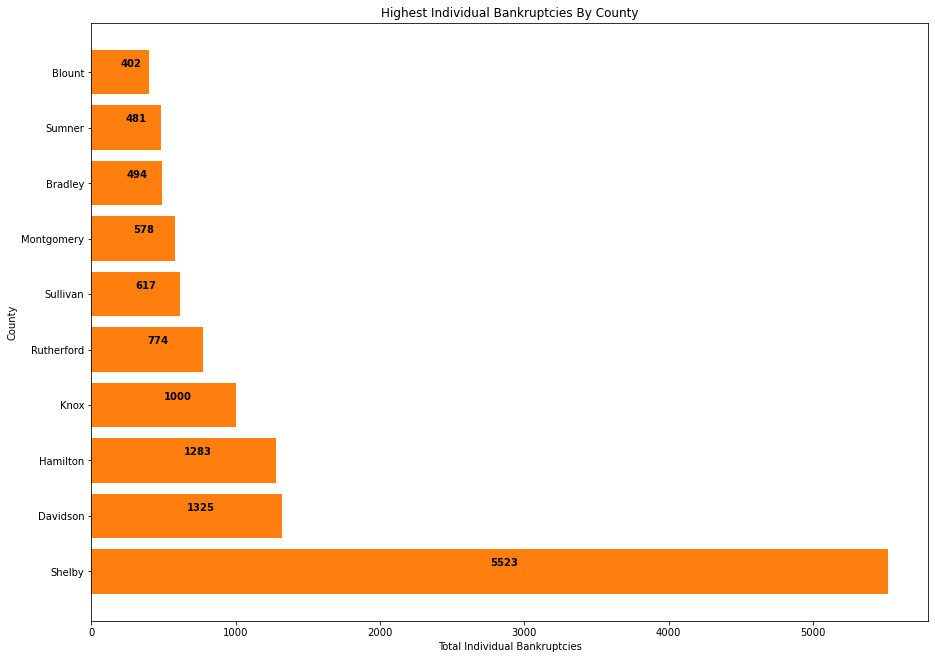

In [22]:
fig = plt.figure(figsize = (15, 11))
plt.barh(County2, Totals)
plt.xlabel('Total Individual Bankruptcies')
plt.ylabel('County')
plt.title('Highest Individual Bankruptcies By County')



for i in plt.barh(County2, Totals):
    plt.text(i.get_width()-0.5*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')

In [23]:
Income_Bank = pd.merge(Income, Bankruptcy, 
                               left_on = 'County', right_on = 'County', 
                               how = 'inner')

In [24]:
Income_Bank.head(5)

Feature ID  Median Household Income  \
0        country:us/state:tn/county:lake                    35191   
1    country:us/state:tn/county:hardeman                    40304   
2  country:us/state:tn/county:lauderdale                    39896   
3        country:us/state:tn/county:clay                    32167   
4    country:us/state:tn/county:fentress                    36520   

   Median Earnings - Total  Per Capita Income  Total Population      County  \
0                    25293              15732              7401        Lake   
1                    28984              18172             25443    Hardeman   
2                    29473              18515             25989  Lauderdale   
3                    24781              18983              7654        Clay   
4                    23495              20093             18213    Fentress   

  State  County Code  Chapter 7  Chapter 13  Unnamed: 4  Unnamed: 5  \
0    TN        47095          7          14         NaN         NaN   
1    TN        47069         28          72         NaN         NaN   
2    TN        47097         30          73         NaN         NaN   
3    TN        47027         14           3         NaN         NaN   
4    TN        47049         25          12         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN          NaN          NaN   

   Unnamed: 12  Total Individual  
0          NaN                21  
1          NaN               100  
2          NaN               103  
3          NaN                17  
4          NaN                37

In [25]:
Income_Bank['Per Capita Individual'] = (Income_Bank['Total Individual'] / Income_Bank['Total Population']) * 100000 

In [26]:
Income_Bank.head(5)

Feature ID  Median Household Income  \
0        country:us/state:tn/county:lake                    35191   
1    country:us/state:tn/county:hardeman                    40304   
2  country:us/state:tn/county:lauderdale                    39896   
3        country:us/state:tn/county:clay                    32167   
4    country:us/state:tn/county:fentress                    36520   

   Median Earnings - Total  Per Capita Income  Total Population      County  \
0                    25293              15732              7401        Lake   
1                    28984              18172             25443    Hardeman   
2                    29473              18515             25989  Lauderdale   
3                    24781              18983              7654        Clay   
4                    23495              20093             18213    Fentress   

  State  County Code  Chapter 7  Chapter 13  ...  Unnamed: 5  Unnamed: 6  \
0    TN        47095          7          14  ...         NaN         NaN   
1    TN        47069         28          72  ...         NaN         NaN   
2    TN        47097         30          73  ...         NaN         NaN   
3    TN        47027         14           3  ...         NaN         NaN   
4    TN        47049         25          12  ...         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2         NaN         NaN         NaN          NaN          NaN          NaN   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4         NaN         NaN         NaN          NaN          NaN          NaN   

   Total Individual  Per Capita Individual  
0                21             283.745440  
1               100             393.035412  
2               103             396.321521  
3                17             222.106088  
4                37             203.151595  

[5 rows x 21 columns]

In [27]:
Income_Bank = Income_Bank.sort_values('Per Capita Individual', ascending=False)

In [28]:
Income_Bank.head(5)

Feature ID  Median Household Income  \
81      country:us/state:tn/county:shelby                    51657   
17     country:us/state:tn/county:haywood                    37905   
65     country:us/state:tn/county:bradley                    51331   
2   country:us/state:tn/county:lauderdale                    39896   
1     country:us/state:tn/county:hardeman                    40304   

    Median Earnings - Total  Per Capita Income  Total Population      County  \
81                    31571              30104            936374      Shelby   
17                    27488              21839             17623     Haywood   
65                    30122              26655            105749     Bradley   
2                     29473              18515             25989  Lauderdale   
1                     28984              18172             25443    Hardeman   

   State  County Code  Chapter 7  Chapter 13  ...  Unnamed: 5  Unnamed: 6  \
81    TN        47157       1572        3951  ...         NaN         NaN   
17    TN        47075         26          75  ...         NaN         NaN   
65    TN        47011        221         273  ...         NaN         NaN   
2     TN        47097         30          73  ...         NaN         NaN   
1     TN        47069         28          72  ...         NaN         NaN   

    Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
81         NaN         NaN         NaN          NaN          NaN          NaN   
17         NaN         NaN         NaN          NaN          NaN          NaN   
65         NaN         NaN         NaN          NaN          NaN          NaN   
2          NaN         NaN         NaN          NaN          NaN          NaN   
1          NaN         NaN         NaN          NaN          NaN          NaN   

    Total Individual  Per Capita Individual  
81              5523             589.828423  
17               101             573.114680  
65               494             467.143897  
2                103             396.321521  
1                100             393.035412  

[5 rows x 21 columns]

In [29]:
County3 = Income_Bank['County'].head(10)
Totals2 = Income_Bank['Per Capita Individual'].head(10)

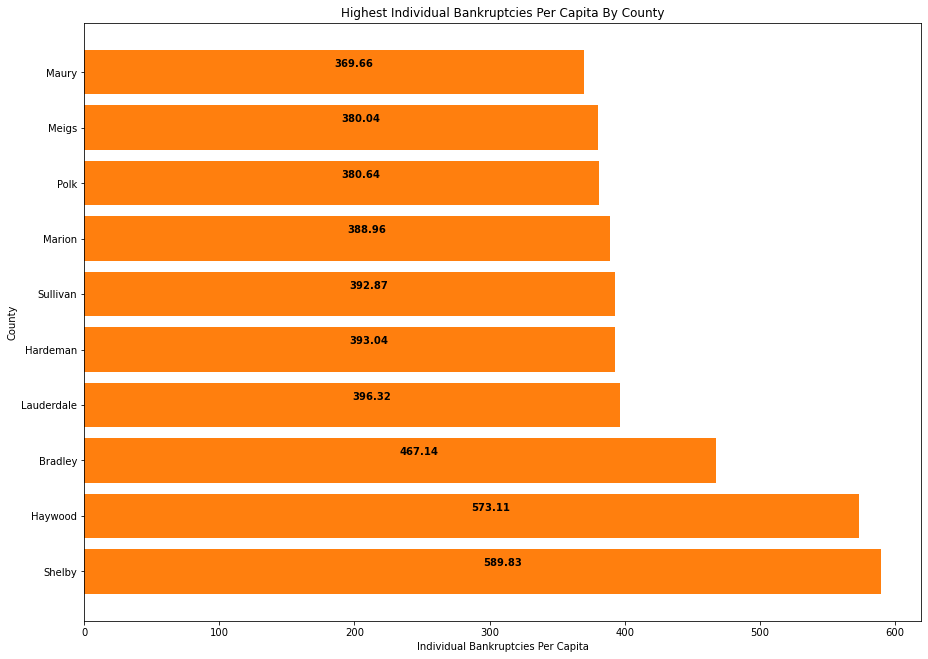

In [30]:
fig = plt.figure(figsize = (15, 11))
plt.barh(County3, Totals2)
plt.xlabel('Individual Bankruptcies Per Capita')
plt.ylabel('County')
plt.title('Highest Individual Bankruptcies Per Capita By County')



for i in plt.barh(County3, Totals2):
    plt.text(i.get_width()-0.5*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')

In [31]:
Schools.head(5)

Region   District No  \
0       SOUTHWEST CORE REGIONAL OFFICE          9570   
1  MID CUMBERLAND CORE REGIONAL OFFICE          9830   
2  MID CUMBERLAND CORE REGIONAL OFFICE          9630   
3       SOUTHWEST CORE REGIONAL OFFICE           550   
4  EAST TENNESSEE CORE REGIONAL OFFICE            51   

                            District   School No   NCES School Number  \
0     MADISON COUNTY PRIVATE SCHOOLS        9705                  NaN   
1       SUMNER COUNTY PRIVATE SCHOOL        9104                  NaN   
2  MONTGOMERY COUNTY PRIVATE SCHOOLS        9005                  NaN   
3                     MCNAIRY COUNTY          10         4.702880e+11   
4                              ALCOA          10         4.700060e+11   

      Type      County                           School  \
0  Private     Madison         5 Point Learning Academy   
1  Private      Sumner                    Aaron Academy   
2  Private  Montgomery  Academy For Academic Excellence   
3   Public     McNairy           Adamsville High School   
4   Public      Blount                Alcoa High School   

                        Email                               Title  Status  \
0                         NaN             Principal: Sherri Yetto       A   
1      becky@aaronacademy.com    Principal: Becky  David Longoria       A   
2        jackiecarey8@aol.com          Principal: Charlene Lollar       A   
3  killingsworths@mcnairy.org  Principal: Mr. Steve Killingsworth       A   
4     rstone@alcoaschools.net            Principal: Rebecca Stone       A   

                    Address  Address2         City  State   Zipcode  \
0       203 Harts Bridge RD       NaN      Jackson     TN   38301.0   
1  650 Nashville  Pike, 6A        NaN     Gallatin     TN   37075.0   
2           303 Fairview LN       NaN  Clarksville     TN   37040.0   
3            815 West Main        NaN   Adamsville     TN   38310.0   
4             1205 Lodge ST       NaN        Alcoa     TN   37701.0   

           Phone1             Fax                  Grade Levels  
0  (731) 225-8672             NaN  K,1,2,3,4,5,6,7,8,9,10,11,12  
1  (615) 452-4700             NaN  K,1,2,3,4,5,6,7,8,9,10,11,12  
2  (931) 647-9831  (931) 647-9832  K,1,2,3,4,5,6,7,8,9,10,11,12  
3  (731) 439-4122             NaN                    9,10,11,12  
4  (865) 982-4631  (865) 380-2240                    9,10,11,12

In [32]:
# Trying To add Geocolumn to School Address to use Folium if need be 

In [33]:
# Concatenate adadress columns into geocoding format
Schools[' Zipcode'] = Schools[' Zipcode'].astype('str')

In [34]:
Schools['ADDRESS'] = Schools[' Address'] + ', ' + Schools[' City'] + ', ' + Schools[' State'] + ' ' + Schools[' Zipcode'].str[:-2]

In [35]:
Schools['ADDRESS'] = Schools['ADDRESS'].str.replace('  ', ' ').str.replace(' ,', ',').str.strip()

In [36]:
Schools.head(5)

Region   District No  \
0       SOUTHWEST CORE REGIONAL OFFICE          9570   
1  MID CUMBERLAND CORE REGIONAL OFFICE          9830   
2  MID CUMBERLAND CORE REGIONAL OFFICE          9630   
3       SOUTHWEST CORE REGIONAL OFFICE           550   
4  EAST TENNESSEE CORE REGIONAL OFFICE            51   

                            District   School No   NCES School Number  \
0     MADISON COUNTY PRIVATE SCHOOLS        9705                  NaN   
1       SUMNER COUNTY PRIVATE SCHOOL        9104                  NaN   
2  MONTGOMERY COUNTY PRIVATE SCHOOLS        9005                  NaN   
3                     MCNAIRY COUNTY          10         4.702880e+11   
4                              ALCOA          10         4.700060e+11   

      Type      County                           School  \
0  Private     Madison         5 Point Learning Academy   
1  Private      Sumner                    Aaron Academy   
2  Private  Montgomery  Academy For Academic Excellence   
3   Public     McNairy           Adamsville High School   
4   Public      Blount                Alcoa High School   

                        Email                               Title  Status  \
0                         NaN             Principal: Sherri Yetto       A   
1      becky@aaronacademy.com    Principal: Becky  David Longoria       A   
2        jackiecarey8@aol.com          Principal: Charlene Lollar       A   
3  killingsworths@mcnairy.org  Principal: Mr. Steve Killingsworth       A   
4     rstone@alcoaschools.net            Principal: Rebecca Stone       A   

                    Address  Address2         City  State  Zipcode  \
0       203 Harts Bridge RD       NaN      Jackson     TN  38301.0   
1  650 Nashville  Pike, 6A        NaN     Gallatin     TN  37075.0   
2           303 Fairview LN       NaN  Clarksville     TN  37040.0   
3            815 West Main        NaN   Adamsville     TN  38310.0   
4             1205 Lodge ST       NaN        Alcoa     TN  37701.0   

           Phone1             Fax                  Grade Levels  \
0  (731) 225-8672             NaN  K,1,2,3,4,5,6,7,8,9,10,11,12   
1  (615) 452-4700             NaN  K,1,2,3,4,5,6,7,8,9,10,11,12   
2  (931) 647-9831  (931) 647-9832  K,1,2,3,4,5,6,7,8,9,10,11,12   
3  (731) 439-4122             NaN                    9,10,11,12   
4  (865) 982-4631  (865) 380-2240                    9,10,11,12   

                                      ADDRESS  
0      203 Harts Bridge RD, Jackson, TN 38301  
1  650 Nashville Pike, 6A, Gallatin, TN 37075  
2      303 Fairview LN, Clarksville, TN 37040  
3         815 West Main, Adamsville, TN 38310  
4              1205 Lodge ST, Alcoa, TN 37701

In [37]:
# An API Key for google maps is needed to continue through notebook

In [38]:
API = 'inseert API here' 

In [39]:
def get_address_coords(address, api_key=API, endpoint = 'https://maps.googleapis.com/maps/api/geocode/', return_format = 'json'):
    print(address)
    endpoint = endpoint+return_format
    params = {'address': address, 'key': api_key}
    res = requests.get(endpoint, params = params)
    result =  res.json()
    try:
        lat_long = result['results'][0]['geometry']['location']
        return Point(lat_long['lng'], lat_long['lat'])
    except:
        print('Failed^^^')
        
# Delete API cell and add insert AP here before push 


In [40]:
Schools['geometry'] = Schools['ADDRESS'].apply(get_address_coords)

203 Harts Bridge RD, Jackson, TN 38301
650 Nashville Pike, 6A, Gallatin, TN 37075
303 Fairview LN, Clarksville, TN 37040
815 West Main, Adamsville, TN 38310
1205 Lodge ST, Alcoa, TN 37701
1105 Clarence Lane, Morristown, TN 37879
449 McCarn CIR, Sevierville, TN 37862
701 North Main ST, Jamestown, TN 38556
140 Maverick CIR, Clinton, TN 37716
130 Maverick CIR, Clinton, TN 37716
5502 Brainerd RD, Chattanooga, TN 37411
5709 North Broadway, Knoxville, TN 37918
1036 Hwy 39 E, Englewood, TN 37329
1900 Hobson PIKE, Antioch, TN 37013
1723 William Blount DR, Maryville, TN 37801
5020 Pleasant Ridge RD, Knoxville, TN 37912
1780 Granby RD, Kingsport, TN 37660
1044 New Beason Well RD, Kingsport, TN 37660
1062 Highway 70, Kingston Springs, TN 37082
3030 Brunswick RD, Bartlett, TN 38133
538 East Holmes RD, Memphis, TN 38109
5475 Airline RD, Arlington, TN 38002
1171 Old Humboldt RD, Jackson, TN 38305
2800 M L King Jr AVE, Knoxville, TN 37914
310 Avon Rd, Memphis, TN 38117
P.O. Box 1054, Maynardville, TN

211 Ensworth AVE, Nashville, TN 37205
7600 Macon RD, Cordova, TN 38018
160 S Hollywood, Memphis, TN 38112
574 Bell RD, Antioch, TN 37013
806 Morrison RD, McMinnville, TN 37110
4950 Fairley RD, Memphis, TN 38109
261 County Road 439, Athens, TN 37303
2595 Fairview W BLVD, Fairview, TN 37062
864 Poplar Creek RD, Oliver Springs, TN 37841
9114 Davies Plantation RD, Bartlett, TN 38133
1905 Ivy LN, Morristown, TN 37814
15354 Old Hickory BLVD, Nashville, TN 37211
1702 North Charles G. Seaver, Clinton, TN 37716
4550 Austin Peay Hwy. North, Memphis, TN 38135
4274 Duncan RD, Millington, TN 38053
495 Red Barn RD, Gruetli - Laager, TN 37339
487 Myatt DR, Madison, TN 37115
P O Box 4208, Bristol, TN 37625
8115 East Brainerd RD, Chattanooga, TN n
124 East Inskip DR, Knoxville, TN 37919
535 Denmark Jackson RD, Jackson, TN 38391
11237 Kingston PIKE, Knoxville, TN 37922
700 Norwood DR, Nashville, TN 37204
15090 Highway 64, Somerville, TN 38068
13520 Hwy 59 West, Somerville, TN 38068
1800 Wilson PKWY, Fay

943 Crestway DR, Athens, TN 37303
500 Madison ST, Shelbyville, TN 37160
4532 Hwy 88 South, Bells, TN 38006
197 Briarwood ST, Camden, TN 38320
109 Spring ST, Pikeville, TN 37367
831 Grandview DR, Maryville, TN 37803
106 W Front ST, Bradford, TN 38316
800 S Lee HWY, Cleveland, TN 37311
615 Martin Luther King Jr BLVD, Bristol, TN 37620
522 W Main ST, Jacksboro, TN 37757
301 W Main ST, Woodbury, TN 37190
Po Box 799, Huntingdon, TN 38344
305 Academy ST, Elizabethton, TN 37643
102 Elizabeth ST, Ashland City, TN 37015
Po Box 327, Henderson, TN 38340
Po Box 179, Tazewell, TN 37879
520 Brown ST, Celina, TN 38551
4300 Mouse Creek N W RD, Cleveland, TN 37312
212 N Hicks ST, Clinton, TN 37716
305 Hedrick DR, Newport, TN 37821
1343 McArthur ST, Manchester, TN 37355
102 Hwy 412 North, Alamo, TN 38001
756 Stanley ST, Crossville, TN 38555
2601 Bransford AVE, Nashville, TN 37204
520 Cherry ST, Dayton, TN 37321
Po Box 369, Decaturville, TN 38329
110 South Public Sq, Smithville, TN 37166
817 N Charlotte 

251 E Pine Mountain RD, Clarksville, TN 37042
66 School DR, Lobelville, TN 37097
412 West Ninth ST, Columbia, TN 38401
1328 N Graham St, Memphis, TN 38122
1270 N Graham St, Memphis, TN 38122
2110 Howell AVE, Memphis, TN 38108
123 Douglas AVE, Nashville, TN 37207
4080 Kirby Pkwy, Memphis, TN 38115
5320 Hickory Hollow PKWY, Antioch, TN 37013
5719 Kingston PIKE, Knoxville, TN 37919
3615 Kingston PIKE, Knoxville, TN 37919
2434 East Fifth AVE, Knoxville, TN 37917
9245 Fox Lonas RD, Knoxville, TN 37923
11549 Snyder RD, Knoxville, TN 37932
401 Henley ST, Knoxville, TN 37902
3006 Lake Brook BLVD, Knoxville, TN 37909
300 Cochran ST, Tiptonville, TN 38079
2920 Highway 641 North, Paris, TN 38242
3720 Roy Messer HWY, White Pine, TN 37890
918 Jarnigan AVE, Morristown, TN 37813
150 Soccer Way, Smyrna, TN 37167
260 Landmark RD, Oneida, TN 37841
1802 Lois ST, Cleveland, TN 37311
114 Campus DR, Dayton, TN 37321
1381 West Massey RD, Memphis, TN 38120
250 Wolverine Trail, Lavergne, TN 37086
1800 Springer

301 Plus Park Blvd. Suite 510, Nashville, TN 37217
4600 Ridgedale RD, Knoxville, TN 37921
2009 Ridgeway, Memphis, TN 38119
254 Jefferson ST, Ripley, TN 38063
404 Holston DR, Greeneville, TN 37744
5600 Western AVE, Knoxville, TN 37921
5600 Western AVE, Knoxville, TN 37921
802 Warrior DR, Murfreesboro, TN 37128
1062 Hwy 70 HWY, Kingston Springs, TN 37082
P O Box 617, Fayetteville, TN 37334
116 Riverside LN, Fayetteville, TN 37334
4250 Highway 641 South, Decaturville, TN 38329
503 Cardiff Valley RD, Rockwood, TN 37854
540 W. Cumberland ST, Kingston, TN 37763
3096 Roane State HWY, Harriman, TN 37748
5240 Highway 76 E, Springfield, TN 37172
800 M.S. Couts BLVD, Springfield, TN 37172
800 M.S. Couts BLVD, Springfield, TN 37172
512 West Rockwood ST, Rockwood, TN 37854
1237 Rossview RD, Clarksville, TN 37043
2240 Southpark Drive #1, Murfreesboro, TN 37128
1098 Espey DR, Smyrna, TN 37167
146 McClellan RD, Jackson, TN 38305
106 Armour DR, Kingston, TN 37763
211 Patterson RD, Sale Creek, TN 37373


In [41]:
Schools.iloc[Schools['ADDRESS'].str.contains('124 East').index[0], Schools.columns.get_loc('geometry')] = Point(-83.9655958, 36.0098153)

In [42]:
type(Schools.iloc[Schools['ADDRESS'].str.contains('124 East').index[0] -1, Schools.columns.get_loc('geometry')])

shapely.geometry.point.Point

In [43]:
Schools = Schools.drop([' Address', ' Address2', ' City', ' State', ' Zipcode', ' NCES School Number'], axis=1)

In [44]:
Schools.head(5)

Region   District No  \
0       SOUTHWEST CORE REGIONAL OFFICE          9570   
1  MID CUMBERLAND CORE REGIONAL OFFICE          9830   
2  MID CUMBERLAND CORE REGIONAL OFFICE          9630   
3       SOUTHWEST CORE REGIONAL OFFICE           550   
4  EAST TENNESSEE CORE REGIONAL OFFICE            51   

                            District   School No     Type      County  \
0     MADISON COUNTY PRIVATE SCHOOLS        9705  Private     Madison   
1       SUMNER COUNTY PRIVATE SCHOOL        9104  Private      Sumner   
2  MONTGOMERY COUNTY PRIVATE SCHOOLS        9005  Private  Montgomery   
3                     MCNAIRY COUNTY          10   Public     McNairy   
4                              ALCOA          10   Public      Blount   

                            School                       Email  \
0         5 Point Learning Academy                         NaN   
1                    Aaron Academy      becky@aaronacademy.com   
2  Academy For Academic Excellence        jackiecarey8@aol.com   
3           Adamsville High School  killingsworths@mcnairy.org   
4                Alcoa High School     rstone@alcoaschools.net   

                                Title  Status          Phone1             Fax  \
0             Principal: Sherri Yetto       A  (731) 225-8672             NaN   
1    Principal: Becky  David Longoria       A  (615) 452-4700             NaN   
2          Principal: Charlene Lollar       A  (931) 647-9831  (931) 647-9832   
3  Principal: Mr. Steve Killingsworth       A  (731) 439-4122             NaN   
4            Principal: Rebecca Stone       A  (865) 982-4631  (865) 380-2240   

                   Grade Levels                                     ADDRESS  \
0  K,1,2,3,4,5,6,7,8,9,10,11,12      203 Harts Bridge RD, Jackson, TN 38301   
1  K,1,2,3,4,5,6,7,8,9,10,11,12  650 Nashville Pike, 6A, Gallatin, TN 37075   
2  K,1,2,3,4,5,6,7,8,9,10,11,12      303 Fairview LN, Clarksville, TN 37040   
3                    9,10,11,12         815 West Main, Adamsville, TN 38310   
4                    9,10,11,12              1205 Lodge ST, Alcoa, TN 37701   

                                geometry  
0         POINT (-83.9655958 36.0098153)  
1  POINT (-86.46132779999999 36.3835506)  
2         POINT (-87.3133591 36.5681619)  
3  POINT (-88.41622799999999 35.2226464)  
4  POINT (-83.98227109999999 35.7934729)

In [45]:
Income_Bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 81 to 93
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Feature ID               94 non-null     object 
 1   Median Household Income  94 non-null     int64  
 2   Median Earnings - Total  94 non-null     int64  
 3   Per Capita Income        94 non-null     int64  
 4   Total Population         94 non-null     int64  
 5   County                   94 non-null     object 
 6   State                    94 non-null     object 
 7   County Code              94 non-null     int64  
 8   Chapter 7                94 non-null     int64  
 9   Chapter 13               94 non-null     int64  
 10  Unnamed: 4               0 non-null      float64
 11  Unnamed: 5               0 non-null      float64
 12  Unnamed: 6               0 non-null      float64
 13  Unnamed: 7               0 non-null      float64
 14  Unnamed: 8               0 

In [46]:
Income_Bank = Income_Bank.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

In [47]:
Income_Bank.head(5)

Feature ID  Median Household Income  \
81      country:us/state:tn/county:shelby                    51657   
17     country:us/state:tn/county:haywood                    37905   
65     country:us/state:tn/county:bradley                    51331   
2   country:us/state:tn/county:lauderdale                    39896   
1     country:us/state:tn/county:hardeman                    40304   

    Median Earnings - Total  Per Capita Income  Total Population      County  \
81                    31571              30104            936374      Shelby   
17                    27488              21839             17623     Haywood   
65                    30122              26655            105749     Bradley   
2                     29473              18515             25989  Lauderdale   
1                     28984              18172             25443    Hardeman   

   State  County Code  Chapter 7  Chapter 13  Total Individual  \
81    TN        47157       1572        3951              5523   
17    TN        47075         26          75               101   
65    TN        47011        221         273               494   
2     TN        47097         30          73               103   
1     TN        47069         28          72               100   

    Per Capita Individual  
81             589.828423  
17             573.114680  
65             467.143897  
2              396.321521  
1              393.035412

In [54]:
Schools.head(5)

Region   District No  \
0       SOUTHWEST CORE REGIONAL OFFICE          9570   
1  MID CUMBERLAND CORE REGIONAL OFFICE          9830   
2  MID CUMBERLAND CORE REGIONAL OFFICE          9630   
3       SOUTHWEST CORE REGIONAL OFFICE           550   
4  EAST TENNESSEE CORE REGIONAL OFFICE            51   

                            District   School No     Type      County  \
0     MADISON COUNTY PRIVATE SCHOOLS        9705  Private     Madison   
1       SUMNER COUNTY PRIVATE SCHOOL        9104  Private      Sumner   
2  MONTGOMERY COUNTY PRIVATE SCHOOLS        9005  Private  Montgomery   
3                     MCNAIRY COUNTY          10   Public     McNairy   
4                              ALCOA          10   Public      Blount   

                            School                       Email  \
0         5 Point Learning Academy                         NaN   
1                    Aaron Academy      becky@aaronacademy.com   
2  Academy For Academic Excellence        jackiecarey8@aol.com   
3           Adamsville High School  killingsworths@mcnairy.org   
4                Alcoa High School     rstone@alcoaschools.net   

                                Title  Status          Phone1             Fax  \
0             Principal: Sherri Yetto       A  (731) 225-8672             NaN   
1    Principal: Becky  David Longoria       A  (615) 452-4700             NaN   
2          Principal: Charlene Lollar       A  (931) 647-9831  (931) 647-9832   
3  Principal: Mr. Steve Killingsworth       A  (731) 439-4122             NaN   
4            Principal: Rebecca Stone       A  (865) 982-4631  (865) 380-2240   

                   Grade Levels                                     ADDRESS  \
0  K,1,2,3,4,5,6,7,8,9,10,11,12      203 Harts Bridge RD, Jackson, TN 38301   
1  K,1,2,3,4,5,6,7,8,9,10,11,12  650 Nashville Pike, 6A, Gallatin, TN 37075   
2  K,1,2,3,4,5,6,7,8,9,10,11,12      303 Fairview LN, Clarksville, TN 37040   
3                    9,10,11,12         815 West Main, Adamsville, TN 38310   
4                    9,10,11,12              1205 Lodge ST, Alcoa, TN 37701   

                                geometry  
0         POINT (-83.9655958 36.0098153)  
1  POINT (-86.46132779999999 36.3835506)  
2         POINT (-87.3133591 36.5681619)  
3  POINT (-88.41622799999999 35.2226464)  
4  POINT (-83.98227109999999 35.7934729)

In [61]:
Schools.loc[0, 'geometry'].x

-83.9655958

In [62]:
Schools.loc[0, 'geometry'].y

36.0098153

In [84]:
def extract_x(geometry):
    return geometry.x

In [85]:
def extract_y(geometry):
    return geometry.y

In [86]:
Schools['lng'] = Schools['geometry'].apply(extract_x)

In [89]:
Schools['lat'] = Schools['geometry'].apply(extract_y)

In [90]:
Schools.head(5)

Region   District No  \
0       SOUTHWEST CORE REGIONAL OFFICE          9570   
1  MID CUMBERLAND CORE REGIONAL OFFICE          9830   
2  MID CUMBERLAND CORE REGIONAL OFFICE          9630   
3       SOUTHWEST CORE REGIONAL OFFICE           550   
4  EAST TENNESSEE CORE REGIONAL OFFICE            51   

                            District   School No     Type      County  \
0     MADISON COUNTY PRIVATE SCHOOLS        9705  Private     Madison   
1       SUMNER COUNTY PRIVATE SCHOOL        9104  Private      Sumner   
2  MONTGOMERY COUNTY PRIVATE SCHOOLS        9005  Private  Montgomery   
3                     MCNAIRY COUNTY          10   Public     McNairy   
4                              ALCOA          10   Public      Blount   

                            School                       Email  \
0         5 Point Learning Academy                         NaN   
1                    Aaron Academy      becky@aaronacademy.com   
2  Academy For Academic Excellence        jackiecarey8@aol.com   
3           Adamsville High School  killingsworths@mcnairy.org   
4                Alcoa High School     rstone@alcoaschools.net   

                                Title  Status          Phone1             Fax  \
0             Principal: Sherri Yetto       A  (731) 225-8672             NaN   
1    Principal: Becky  David Longoria       A  (615) 452-4700             NaN   
2          Principal: Charlene Lollar       A  (931) 647-9831  (931) 647-9832   
3  Principal: Mr. Steve Killingsworth       A  (731) 439-4122             NaN   
4            Principal: Rebecca Stone       A  (865) 982-4631  (865) 380-2240   

                   Grade Levels                                     ADDRESS  \
0  K,1,2,3,4,5,6,7,8,9,10,11,12      203 Harts Bridge RD, Jackson, TN 38301   
1  K,1,2,3,4,5,6,7,8,9,10,11,12  650 Nashville Pike, 6A, Gallatin, TN 37075   
2  K,1,2,3,4,5,6,7,8,9,10,11,12      303 Fairview LN, Clarksville, TN 37040   
3                    9,10,11,12         815 West Main, Adamsville, TN 38310   
4                    9,10,11,12              1205 Lodge ST, Alcoa, TN 37701   

                                geometry        lng        lat  
0         POINT (-83.9655958 36.0098153) -83.965596  36.009815  
1  POINT (-86.46132779999999 36.3835506) -86.461328  36.383551  
2         POINT (-87.3133591 36.5681619) -87.313359  36.568162  
3  POINT (-88.41622799999999 35.2226464) -88.416228  35.222646  
4  POINT (-83.98227109999999 35.7934729) -83.982271  35.793473

In [ ]:
# Saved files to CSV after maniupulation and creation of geometry column

In [91]:
Schools.to_csv('../data/Schools.csv', index=False)

In [ ]:
Income_Bank.to_csv('../data/Income_and_Bankruptcy.csv', index=False)

In [ ]:
# Save file to Json and add location columns

In [92]:
Schools = gpd.GeoDataFrame(Schools, geometry='geometry')

In [93]:
Schools.head(5)

Region   District No  \
0       SOUTHWEST CORE REGIONAL OFFICE          9570   
1  MID CUMBERLAND CORE REGIONAL OFFICE          9830   
2  MID CUMBERLAND CORE REGIONAL OFFICE          9630   
3       SOUTHWEST CORE REGIONAL OFFICE           550   
4  EAST TENNESSEE CORE REGIONAL OFFICE            51   

                            District   School No     Type      County  \
0     MADISON COUNTY PRIVATE SCHOOLS        9705  Private     Madison   
1       SUMNER COUNTY PRIVATE SCHOOL        9104  Private      Sumner   
2  MONTGOMERY COUNTY PRIVATE SCHOOLS        9005  Private  Montgomery   
3                     MCNAIRY COUNTY          10   Public     McNairy   
4                              ALCOA          10   Public      Blount   

                            School                       Email  \
0         5 Point Learning Academy                         NaN   
1                    Aaron Academy      becky@aaronacademy.com   
2  Academy For Academic Excellence        jackiecarey8@aol.com   
3           Adamsville High School  killingsworths@mcnairy.org   
4                Alcoa High School     rstone@alcoaschools.net   

                                Title  Status          Phone1             Fax  \
0             Principal: Sherri Yetto       A  (731) 225-8672             NaN   
1    Principal: Becky  David Longoria       A  (615) 452-4700             NaN   
2          Principal: Charlene Lollar       A  (931) 647-9831  (931) 647-9832   
3  Principal: Mr. Steve Killingsworth       A  (731) 439-4122             NaN   
4            Principal: Rebecca Stone       A  (865) 982-4631  (865) 380-2240   

                   Grade Levels                                     ADDRESS  \
0  K,1,2,3,4,5,6,7,8,9,10,11,12      203 Harts Bridge RD, Jackson, TN 38301   
1  K,1,2,3,4,5,6,7,8,9,10,11,12  650 Nashville Pike, 6A, Gallatin, TN 37075   
2  K,1,2,3,4,5,6,7,8,9,10,11,12      303 Fairview LN, Clarksville, TN 37040   
3                    9,10,11,12         815 West Main, Adamsville, TN 38310   
4                    9,10,11,12              1205 Lodge ST, Alcoa, TN 37701   

                     geometry        lng        lat  
0  POINT (-83.96560 36.00982) -83.965596  36.009815  
1  POINT (-86.46133 36.38355) -86.461328  36.383551  
2  POINT (-87.31336 36.56816) -87.313359  36.568162  
3  POINT (-88.41623 35.22265) -88.416228  35.222646  
4  POINT (-83.98227 35.79347) -83.982271  35.793473

In [94]:
Schools.to_file("Schools.geojson", driver = 'GeoJSON')

In [ ]:
# Schools_in_'Specific County' = Schools_by_county.loc[Schools_by_county['NAME'] == 'Specific County']
# Schools_in_'Specific County'.shape

In [ ]:
# polygon'Specific County' = counties.loc[counties['NAME'] == 'Specific County']
# polygon'Specific County'.shape

In [ ]:
35.864320444977146, -86.36219096598812

In [ ]:
# Merging and trying to map school data

In [ ]:
School_tn = pd.merge(left = counties, right = Schools,
                    left_on = 'NAME', right_on = 'County')
School_tn.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
School_tn.plot(column = 'County',
               cmap = 'Purples',
               edgecolor = 'grey',
                legend = True,
              ax = ax)
plt.title('Median Income Reported By County in 2015-2020', fontsize = 16)
ax.axis('off');